In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv(r'../data\listings_Valencia.csv')

In [3]:
#Añadimos una columna llamada ciudad
df['city'] = 'Valencia'

In [4]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,922483078848880362,https://www.airbnb.com/rooms/922483078848880362,20250315152909,2025-03-15,city scrape,piso acogedor,This place has a strategic location: a 5-minut...,NaN,https://a0.muscache.com/pictures/7ace9e77-5619...,20512920,https://www.airbnb.com/users/show/20512920,Floren,2014-08-25,"Valencia, Spain","Me gusta mucho viajar, he visitado ciudades eu...",within a few hours,100%,47%,f,https://a0.muscache.com/im/users/20512920/prof...,https://a0.muscache.com/im/users/20512920/prof...,NaN,1,2,"['email', 'phone']",t,t,NaN,RUSSAFA,L'EIXAMPLE,39.463599,-0.374307,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,2.0,"[""Wifi"", ""Air conditioning"", ""Fire extinguishe...",$143.00,2,365,1,2,365,365,2.0,365.0,NaN,t,3,4,4,77,2025-03-15,9,5,0,4,5,30,4290.0,2023-08-08,2024-12-03,4.78,4.78,4.44,4.89,4.89,5.00,4.56,NaN,f,1,1,0,0,0.46,Valencia
1,968111902707427537,https://www.airbnb.com/rooms/968111902707427537,20250315152909,2025-03-16,city scrape,#2 Soho By The Sea. Beach studio,Welcome to our unique studio in the heart of C...,NaN,https://a0.muscache.com/pictures/9fe7cdd9-2ad9...,512484841,https://www.airbnb.com/users/show/512484841,Ivaylo,2023-04-30,"Valencia, Spain",NaN,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,6,6,"['email', 'phone']",t,t,NaN,CABANYAL-CANYAMELAR,POBLATS MARITIMS,39.470366,-0.329770,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""AC - split type ductless system"", ""Smoke ala...",$109.00,4,365,3,4,1125,1125,4.0,1125.0,NaN,t,30,60,90,180,2025-03-16,30,15,0,180,17,120,13080.0,2023-09-03,2024-08-27,4.87,4.80,4.83,4.97,5.00,4.87,4.67,NaN,f,5,5,0,0,1.60,Valencia


#### CAMBIO DE TIPOS

In [6]:
# lo primero que podemos comprobar es el tipo de dato de cada columna
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [7]:
#cambiamos lastreview de object a datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### COMPROBACIÓN DE DATOS

In [9]:
df.duplicated().sum() #comprueba si hay duplicados

np.int64(0)

In [10]:
# COMPROBAR SI HAY DUPLICADOS PARCIALES

# Asegurar que 'price' es numérico (quitar símbolos si es necesario)
df['price'] = df['price'].replace('[\$,€]', '', regex=True).astype(float)

# Seleccionar columnas relevantes para duplicados parciales
subset = ['neighbourhood_cleansed', 'room_type']  # Quitamos 'price' del subset

# Encontrar duplicados parciales
duplicados_parciales = df[df.duplicated(subset=subset, keep=False)]

# Quedarse con el duplicado que tenga el precio más alto en cada grupo
duplicados_max_precio = (
    duplicados_parciales
    .sort_values('price', ascending=False)
    .drop_duplicates(subset=subset, keep='first')
)

# Mostrar resultados
print(f"Duplicados parciales originales: {len(duplicados_parciales)}")
print(f"Duplicados eliminados, se conservan los de mayor precio: {len(duplicados_max_precio)}")
print(duplicados_max_precio[[*subset, 'price', 'id']].sort_values(by=subset))



Duplicados parciales originales: 8833
Duplicados eliminados, se conservan los de mayor precio: 160
                    neighbourhood_cleansed        room_type    price  \
6582                                 AIORA  Entire home/apt   5000.0   
6781                                 AIORA     Private room    500.0   
3925                                ALBORS  Entire home/apt    781.0   
8472                                ALBORS     Private room    300.0   
6713                           ARRANCAPINS  Entire home/apt    443.0   
5560                           ARRANCAPINS     Private room    154.0   
3438                             BENICALAP  Entire home/apt   9000.0   
2521                             BENICALAP     Private room    190.0   
3305                             BENIFERRI  Entire home/apt    176.0   
2014                             BENIFERRI     Private room     70.0   
2001                            BENIMACLET  Entire home/apt    377.0   
2042                            BENIM

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\rey_d\AppData\Local\Temp\ipykernel_31144\1247158581.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,€]', '', regex=True).astype(float)


In [11]:
df.isnull().sum() #comprueba si hay valores nulos

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                      245
neighborhood_overview                           5087
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                   2330
host_about                                      4276
host_response_time                               614
host_response_rate                               614
host_acceptance_rate                             377
host_is_superhost                             

In [12]:
df.isnull().sum() / len(df) * 100 #porcentaje de valores nulos por columna

id                                                0.000000
listing_url                                       0.000000
scrape_id                                         0.000000
last_scraped                                      0.000000
source                                            0.000000
name                                              0.000000
description                                       2.769300
neighborhood_overview                            57.499717
picture_url                                       0.000000
host_id                                           0.000000
host_url                                          0.000000
host_name                                         0.000000
host_since                                        0.000000
host_location                                    26.336611
host_about                                       48.332768
host_response_time                                6.940206
host_response_rate                                6.9402

<Axes: >

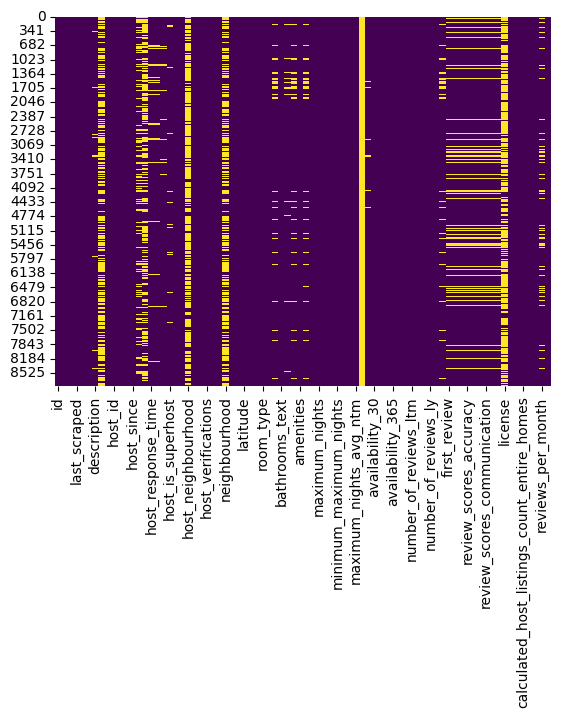

In [13]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #visualiza los valores nulos

In [14]:
# al no corresponder a ninguno, cambiamos el valor nulo a sin datos
df['license'] = df['license'].fillna('Sin datos')

In [15]:
#df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


In [16]:
#print(df['last_review'].notna().sum())

In [17]:
#ver los valores no válidos en 'last_review'
'''invalid_dates = df.loc[
    pd.to_datetime(df['last_review'], errors='coerce').isna(),
    'last_review'
].unique()

print("Valores no válidos en 'last_review':", invalid_dates)'''

'invalid_dates = df.loc[\n    pd.to_datetime(df[\'last_review\'], errors=\'coerce\').isna(),\n    \'last_review\'\n].unique()\n\nprint("Valores no válidos en \'last_review\':", invalid_dates)'

In [18]:
# Cuántas filas totales tienes
'''print("Total filas:", len(df))

# Cuántos valores no nulos tiene la columna last_review
print("Valores válidos en last_review:", df['last_review'].notna().sum())

# Muestra primeras filas de la columna last_review para ver qué hay
print(df['last_review'].head(10))'''

'print("Total filas:", len(df))\n\n# Cuántos valores no nulos tiene la columna last_review\nprint("Valores válidos en last_review:", df[\'last_review\'].notna().sum())\n\n# Muestra primeras filas de la columna last_review para ver qué hay\nprint(df[\'last_review\'].head(10))'

In [19]:
#print(df['last_review'].describe())

In [20]:
#eliminar nulos first_review
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')

In [21]:
#Rellenar los valores nulos con una fecha por defecto,
df['first_review'] = pd.to_datetime(df['first_review'])  # Asegura el tipo datetime
latest_date = df['first_review'].max()
df['first_review'] = df['first_review'].fillna('2000-01-01')

In [22]:
print(df['first_review'].notna().sum())


8847


In [23]:
#ver los valores no válidos en 'first_review'
invalid_dates = df.loc[
    pd.to_datetime(df['first_review'], errors='coerce').isna(),
    'first_review'
].unique()

print("Valores no válidos en 'first_review':", invalid_dates)

Valores no válidos en 'first_review': <DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]


In [24]:
# Cuántas filas totales tienes
print("Total filas:", len(df))

# Cuántos valores no nulos tiene la columna first_review
print("Valores válidos en first_review:", df['first_review'].notna().sum())

# Muestra primeras filas de la columna first_review para ver qué hay
print(df['first_review'].head(10))

Total filas: 8847
Valores válidos en first_review: 8847
0   2023-08-08
1   2023-09-03
2   2023-08-30
3   2023-10-06
4   2023-07-09
5   2023-08-19
6   2016-05-30
7   2022-07-01
8   2024-12-26
9   2024-06-24
Name: first_review, dtype: datetime64[ns]


In [25]:
print(df['first_review'].describe())

count                             8847
mean     2018-05-15 12:11:08.972533248
min                2000-01-01 00:00:00
25%                2017-06-25 12:00:00
50%                2022-09-17 00:00:00
75%                2024-03-30 00:00:00
max                2025-03-15 00:00:00
Name: first_review, dtype: object


###### precio nulo

In [26]:
print("Total de precios nulos:", df['price'].isnull().sum())

Total de precios nulos: 689


In [27]:
#Revisar columnas comparables 

print("Columnas disponibles:", df.columns)
print("Tipos de habitación:", df['room_type'].unique())
print("Barrios únicos:", df['neighbourhood'].nunique())

# Promedio de precio por tipo de habitación y barrio
print(df.groupby(['neighbourhood', 'room_type'])['price'].mean().head(10))

Columnas disponibles: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximu

In [28]:
#Rellenar precios faltantes con promedio de registros similares

# Calcular el promedio de precio por combinación barrio + tipo de habitación y convertir a dict
precio_promedio = df.groupby(['neighbourhood', 'room_type'])['price'].mean().to_dict()

# Función para imputar precios
def imputar_precio(fila):
    if pd.isnull(fila['price']):
        valor = precio_promedio.get((fila['neighbourhood'], fila['room_type']))
        # Si no hay promedio para esa combinación o es NaN, usar promedio general
        if pd.isnull(valor):
            return df['price'].mean()
        else:
            return valor
    return fila['price']

# Aplicar la función
df['price'] = df.apply(imputar_precio, axis=1)

In [29]:
print("Precios nulos restantes:", df['price'].isnull().sum())

Precios nulos restantes: 0


In [30]:
#rellenamos los valores de nulos en description con los datos de name
def rellenar_descripcion(fila):
    if pd.isna(fila['description']) or fila['description'].strip() == '':
        return fila['name']  # o cualquier otra columna que quieras usar
    else:
        return fila['description']

df['description'] = df.apply(rellenar_descripcion, axis=1)


In [31]:
#neighborhood_overview->descripción general del barrio o vecindario donde se encuentra el alojamiento.
# Obtener la descripción más frecuente por barrio
descripcion_mas_frecuente = df.groupby('neighbourhood_cleansed')['neighborhood_overview'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Sin información')

def imputar_overview(fila):
    if pd.isna(fila['neighborhood_overview']) or fila['neighborhood_overview'].strip() == '':
        return descripcion_mas_frecuente.get(fila['neighbourhood'], 'Sin información')
    else:
        return fila['neighborhood_overview']

df['neighborhood_overview'] = df.apply(imputar_overview, axis=1)


In [32]:
#rellenamos host_location con los datos de host_neighbourhood
# Calcular moda por host_neighbourhood
moda_por_vecindario = df.groupby('host_neighbourhood')['host_location'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Desconocida')

def imputar_host_location(fila):
    if pd.isna(fila['host_location']):
        return moda_por_vecindario.get(fila['host_neighbourhood'], 'Desconocida')
    else:
        return fila['host_location']

df['host_location'] = df.apply(imputar_host_location, axis=1)


In [33]:
#host_about->descripción del anfitrión
def rellenar_host_about(fila):
    if pd.isna(fila['host_about']) or fila['host_about'].strip() == '':
        return f"Anfitrión {fila['host_name']} de {fila['host_location']}"
    return fila['host_about']

df['host_about'] = df.apply(rellenar_host_about, axis=1)


In [34]:
#host_response_time->tiempo de respuesta del anfitrión
moda_por_superhost = df.groupby('host_is_superhost')['host_response_time'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'No especificado')

def imputar_response_time(fila):
    if pd.isna(fila['host_response_time']):
        return moda_por_superhost.get(fila['host_is_superhost'], 'No especificado')
    return fila['host_response_time']

df['host_response_time'] = df.apply(imputar_response_time, axis=1)


In [35]:
#host_response_rate -> tasa de respuesta del anfitrión.
# Asegurarse que host_response_rate sea numérico (sin %)
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)

# Calcular la media por grupo y usar transform para asignar la media a cada fila según grupo
media_por_response_time = df.groupby('host_response_time')['host_response_rate'].transform('mean')

# Imputar nulos con la media del grupo correspondiente
df['host_response_rate'] = df['host_response_rate'].fillna(media_por_response_time)


In [36]:
#host_response_rate -> tasa de respuesta del anfitrión
#Convertir la columna a numérica (quitando el %)

# Si hay valores con '%' mezclados o la columna no es string:
df['host_response_rate'] = df['host_response_rate'].astype(str).str.rstrip('%')
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')

# Ahora imputar con media agrupada por host_response_time
media_por_response_time = df.groupby('host_response_time')['host_response_rate'].transform('mean')
df['host_response_rate'] = df['host_response_rate'].fillna(media_por_response_time)

# Rellenar posibles valores aún nulos con mediana global
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())



In [37]:
#host_acceptance_rate -> tasa de aceptación del anfitrión, es decir, el porcentaje de solicitudes de reserva que el anfitrión acepta
# Convertir a string, eliminar el %, y convertir a número
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(str).str.rstrip('%')
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'], errors='coerce')

#Media agrupada por múltiples factores
#agrupar por más de una variable si quieres más precisión, como host_is_superhost y host_response_time.

media_por_grupo = df.groupby(['host_is_superhost', 'host_response_time'])['host_acceptance_rate'].transform('mean')
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(media_por_grupo)

#Rellenar nulos restantes con mediana global
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median())

In [38]:
#host_is_superhost -> indica si el anfitrión es un superanfitrión
# Dejar los valores existentes como están, y rellenar los nulos con 'sin_datos'
df['host_is_superhost'] = df['host_is_superhost'].fillna('Sin datos')

In [39]:
#host_neighbourhood -> barrio del anfitrión
# Solo rellenar si host_neighbourhood está nulo
df['host_neighbourhood'] = df['host_neighbourhood'].fillna(df['neighbourhood_cleansed'])

In [40]:
#neighbourhood -> barrio del alojamiento
df['neighbourhood'] = df['neighbourhood'].fillna(df['neighbourhood_cleansed'])


In [41]:
#Usar la media agrupada por tipo de propiedad y capacidad
#Esto asegura que propiedades similares tengan valores coherentes:

# Agrupar por tipo de propiedad y capacidad
df['bathrooms'] = df['bathrooms'].fillna(
    df.groupby(['property_type', 'accommodates'])['bathrooms'].transform('mean')
)

#si aun quedan nulos, rellenar con la media global
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

In [42]:
#bathromms_text -> texto descriptivo de los baños
#Rellenar con texto genérico basado en el promedio calculado de bathrooms

def texto_banos(num_banos):
    if pd.isna(num_banos):
        return 'sin datos'
    elif num_banos == 0.5:
        return 'Half-bath'
    elif num_banos.is_integer():
        return f"{int(num_banos)} bath"
    else:
        return f"{num_banos} baths"

# Primero, asegúrate de que la columna bathrooms existe y está completa (rellena los nulos antes)
# Por ejemplo, con el código que te di antes para extraer y rellenar bathrooms

# Luego rellena los nulos de bathrooms_text basándote en bathrooms numérico
df.loc[df['bathrooms_text'].isna(), 'bathrooms_text'] = df.loc[df['bathrooms_text'].isna(), 'bathrooms'].apply(texto_banos)

In [43]:
#bedrooms -> número de habitaciones
#Rellenar con la media o mediana agrupada
#Por ejemplo, calcular la media o mediana de bedrooms según property_type y/o accommodates, para que la imputación sea más precisa:

# Usando mediana (más robusta a valores extremos)
df['bedrooms'] = df['bedrooms'].fillna(
    df.groupby(['property_type', 'accommodates'])['bedrooms'].transform('median')
)

#Si aún quedan nulos, rellenar con la mediana global

df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

In [44]:
#Beds -> rellenar nulos usando la mediana agrupada por property_type y accommodates
#Esto es ideal para que la imputación tenga sentido según el tipo de alojamiento y la capacidad:

df['beds'] = df['beds'].fillna(
    df.groupby(['property_type', 'accommodates'])['beds'].transform('median')
)

#Rellenar los nulos restantes con la mediana global

df['beds'] = df['beds'].fillna(df['beds'].median())

#Convertir a entero (ya que el número de camas suele ser entero)

df['beds'] = df['beds'].round(0).astype(int)

In [45]:
df['calendar_updated'] = df['calendar_updated'].fillna('Sin datos')


In [46]:
print(df['has_availability'].head(20))
print(df['has_availability'].value_counts(dropna=False))


0       t
1       t
2       t
3       t
4       t
5       t
6       t
7       t
8       t
9       t
10    NaN
11      t
12      t
13      t
14      t
15      t
16      t
17      t
18      t
19      t
Name: has_availability, dtype: object
has_availability
t      8714
NaN     133
Name: count, dtype: int64


In [47]:
#has_availability -> indica si el alojamiento está disponible

# 1. Rellenar nulos con la moda ('t')
moda = df['has_availability'].mode()[0]
df['has_availability'] = df['has_availability'].fillna(moda)

# 2. Mapear 't' -> True, 'f' -> False (si acaso hay 'f')
df['has_availability'] = df['has_availability'].map({'t': True, 'f': False})

# 3. Por si hay valores que no son 't' ni 'f', rellenar nulos restantes con False
df['has_availability'] = df['has_availability'].fillna(False).astype(bool)

# Validar resultados
print(df['has_availability'].value_counts(dropna=False))
print(df['has_availability'].dtype)

#Rellenar los nulos en has_availability con la moda (el valor más común) es más apropiado que poner "sin datos", porque:
#   - has_availability es una variable categórica binaria (sí/no), no texto libre.
#  - Poner "sin datos" introduciría una categoría nueva que puede confundir modelos o análisis estadísticos.
#  - Imputar con la moda mantiene la distribución original de la variable, evitando sesgo fuerte.

has_availability
True    8847
Name: count, dtype: int64
bool


In [48]:
print(df['has_availability'].head(20))
print(df['has_availability'].value_counts(dropna=False))

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: has_availability, dtype: bool
has_availability
True    8847
Name: count, dtype: int64


In [49]:
#estimated_revenue_l365d -> ingresos estimados en los últimos 365 días

# Primero aseguramos que price es numérico y sin nulos (imputa si hace falta)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'] = df['price'].fillna(df['price'].median())

# Si estimated_occupancy_l365d está disponible y es confiable:
df['estimated_revenue_l365d'] = df['price'] * 365 * df['estimated_occupancy_l365d']

# Si no, puedes usar availability_365 para estimar días rentados:
df['days_rented'] = 365 - df['availability_365']
df['estimated_revenue_l365d'] = df['price'] * df['days_rented']

# Maneja nulos o valores extraños en availability_365
df['days_rented'] = df['days_rented'].clip(lower=0)  # evita negativos
df['estimated_revenue_l365d'] = df['estimated_revenue_l365d'].fillna(0)

# Verifica resultados
print(df[['price', 'availability_365', 'estimated_occupancy_l365d', 'estimated_revenue_l365d']].head())


   price  availability_365  estimated_occupancy_l365d  estimated_revenue_l365d
0  143.0                77                         30                  41184.0
1  109.0               180                        120                  20165.0
2  120.0               172                         88                  23160.0
3  109.0               172                         72                  21037.0
4  134.0               316                        210                   6566.0


In [50]:
#review_scores_rating -> calificación general promedio

#revisamos la proporción de nulos
print(df['review_scores_rating'].isnull().mean())

#Código recomendado para imputar con mediana global:
median_rating = df['review_scores_rating'].median()
df['review_scores_rating'] = df['review_scores_rating'].fillna(median_rating)

## Agrupar por barrio, tipo de propiedad y tipo de habitación y rellenar nulos con mediana de cada grupo
df['review_scores_rating'] = df.groupby(
    ['neighbourhood', 'property_type', 'room_type']
)['review_scores_rating'].transform(lambda x: x.fillna(x.median()))

# Rellenar cualquier nulo restante con la mediana global
median_global = df['review_scores_rating'].median()
df['review_scores_rating'] = df['review_scores_rating'].fillna(median_global)

# Verificar que no quedan nulos
print("Nulos restantes en review_scores_rating:", df['review_scores_rating'].isnull().sum())



0.17553973098225387
Nulos restantes en review_scores_rating: 0


In [51]:
# Convertir a datetime con errores a NaT (ya hecho)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Ver cuántos nulos hay
print("Nulos antes de rellenar:", df['last_review'].isna().sum())

# Calcular fecha mínima válida (excluyendo NaT)
min_fecha = df['last_review'].min()

# Rellenar nulos con la fecha mínima
df['last_review'] = df['last_review'].fillna(min_fecha)

# Ver cuántos nulos quedan
print("Nulos después de rellenar:", df['last_review'].isna().sum())

invalid_dates = df.loc[
    pd.to_datetime(df['last_review'], errors='coerce').isna(),
    'last_review'
].unique()

print("Valores no válidos en 'last_review':", invalid_dates)


Nulos antes de rellenar: 1553
Nulos después de rellenar: 0
Valores no válidos en 'last_review': <DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]


In [52]:
#review_scores_accuracy  -> precisión de las reseñas

# Paso 1: Calcular mediana global
median_global = df['review_scores_accuracy'].median()

# Paso 2: Función que rellena nulos solo si hay datos para ese grupo
def fill_group_median(x):
    if x.notnull().sum() > 0:
        return x.fillna(x.median())
    else:
        return x

df['review_scores_accuracy'] = df.groupby(
    ['neighbourhood', 'property_type', 'room_type']
)['review_scores_accuracy'].transform(fill_group_median)

# Paso 3: Rellenar los nulos restantes con mediana global
df['review_scores_accuracy'] = df['review_scores_accuracy'].fillna(median_global)

print("Nulos restantes en review_scores_accuracy:", df['review_scores_accuracy'].isnull().sum())



Nulos restantes en review_scores_accuracy: 0


In [53]:
#review_scores_cleanliness -> limpieza de las reseñas

median_global = df['review_scores_cleanliness'].median()

def fill_group_median(x):
    if x.notnull().sum() > 0:
        return x.fillna(x.median())
    else:
        return x

df['review_scores_cleanliness'] = df.groupby(
    ['neighbourhood', 'property_type', 'room_type']
)['review_scores_cleanliness'].transform(fill_group_median)

df['review_scores_cleanliness'] = df['review_scores_cleanliness'].fillna(median_global)

print("Nulos restantes en review_scores_cleanliness:", df['review_scores_cleanliness'].isnull().sum())


Nulos restantes en review_scores_cleanliness: 0


In [54]:
#review_scores_checkin -> check-in de las reseñas
median_global = df['review_scores_checkin'].median()

def fill_group_median(x):
    if x.notnull().sum() > 0:
        return x.fillna(x.median())
    else:
        return x

df['review_scores_checkin'] = df.groupby(
    ['neighbourhood', 'property_type', 'room_type']
)['review_scores_checkin'].transform(fill_group_median)

df['review_scores_checkin'] = df['review_scores_checkin'].fillna(median_global)

print("Nulos restantes en review_scores_checkin:", df['review_scores_checkin'].isnull().sum())


Nulos restantes en review_scores_checkin: 0


In [55]:
#review_scores_communication -> comunicación de las reseñas
median_global = df['review_scores_communication'].median()

def fill_group_median(x):
    if x.notnull().sum() > 0:
        return x.fillna(x.median())
    else:
        return x

df['review_scores_communication'] = df.groupby(
    ['neighbourhood', 'property_type', 'room_type']
)['review_scores_communication'].transform(fill_group_median)

df['review_scores_communication'] = df['review_scores_communication'].fillna(median_global)

print("Nulos restantes en review_scores_communication:", df['review_scores_communication'].isnull().sum())


Nulos restantes en review_scores_communication: 0


In [56]:
#review_scores_location -> ubicación de las reseñas
median_global = df['review_scores_location'].median()

def fill_group_median(x):
    if x.notnull().sum() > 0:
        return x.fillna(x.median())
    else:
        return x

df['review_scores_location'] = df.groupby(['neighbourhood', 'property_type'])['review_scores_location'].transform(fill_group_median)

df['review_scores_location'] = df['review_scores_location'].fillna(median_global)

print("Nulos restantes en review_scores_location:", df['review_scores_location'].isnull().sum())


Nulos restantes en review_scores_location: 0


In [57]:
#review_scores_value -> valor de las reseñas
median_global = df['review_scores_value'].median()

def fill_group_median(x):
    if x.notnull().sum() > 0:
        return x.fillna(x.median())
    else:
        return x

df['review_scores_value'] = df.groupby(['property_type', 'room_type', 'neighbourhood'])['review_scores_value'].transform(fill_group_median)

df['review_scores_value'] = df['review_scores_value'].fillna(median_global)

print("Nulos restantes en review_scores_value:", df['review_scores_value'].isnull().sum())


Nulos restantes en review_scores_value: 0


In [58]:
#reviews_per_month -> reseñas por mes
median_global = df['reviews_per_month'].median()

def fill_group_median(x):
    if x.notnull().sum() > 0:
        return x.fillna(x.median())
    else:
        return x

# Agrupamos por 'number_of_reviews' y 'room_type' (puedes agregar más variables si quieres)
df['reviews_per_month'] = df.groupby(['number_of_reviews', 'room_type'])['reviews_per_month'].transform(fill_group_median)

# Rellenar cualquier nulo restante con la mediana global
df['reviews_per_month'] = df['reviews_per_month'].fillna(median_global)

print("Nulos restantes en reviews_per_month:", df['reviews_per_month'].isnull().sum())


Nulos restantes en reviews_per_month: 0


In [59]:
df.isnull().sum()  # Revisa nuevamente si hay valores nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_thumbnail_url                              0


<Axes: >

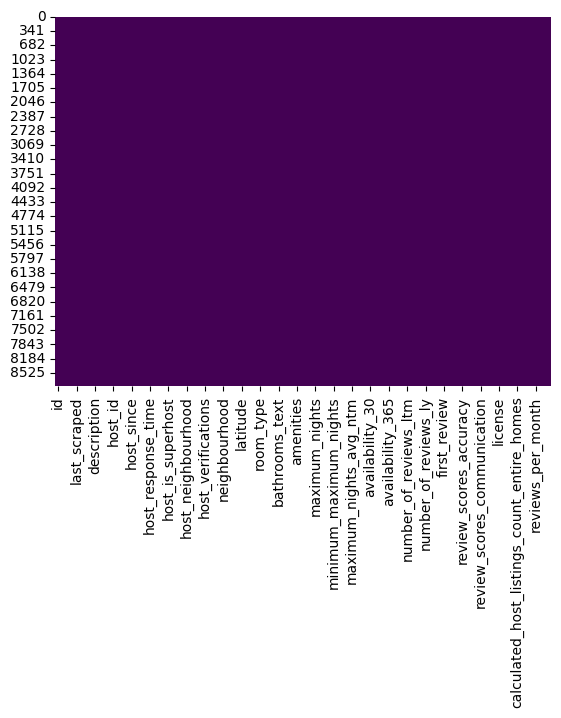

In [60]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #visualiza los valores nulos

In [61]:
df_limpio_valencia = df.copy()

In [62]:
#guardamos
df_limpio_valencia.to_csv(r"..\data\Valencia_limpio.csv", index=False)